In [1]:
import os
import math
import copy
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import class_definitions as cd
import function_definitions as fd
import fish_kinematics as fk
import airfoil as ar

%matplotlib inline

First we use the airfoil functions to make a NACA0012 airfoil

A fish body can be modeled using the function **naca4(x, t, c, m=0.0, p=0.30, a4=True)** where, 
    **x** is a 1D numpy array of x-coordinates, 
    **c** is the chord length,
    **t** is the maximum thickness,
    **m** is the maximum camber (defaul is symmetric),
    **p** is the location of maximum camber (should be a non-zero number), and 
    **a4** determines if it has an open or closed edge.

In [2]:
chord = 1.0
# half-cosine spacing
beta = np.linspace(0, np.pi, 100)
dx = (0.5*(1-np.cos(beta)))
# uniform spacing
# dx = np.linspace(0.0, chord, 100)
x, y = ar.naca4(dx, 0.12, chord, 0.0, 0.30, True)

(-0.1, 0.1)

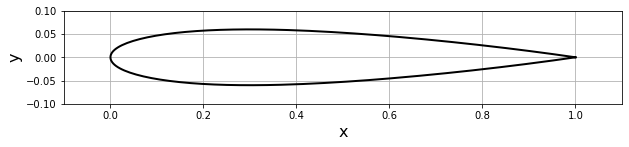

In [3]:
# plot geometry
width = 10
plt.figure(figsize=(width, width))
plt.grid()
plt.xlabel('x', fontsize=16)
plt.ylabel('y', fontsize=16)
plt.plot(x, y, color='k', linestyle='-', linewidth=2)
plt.axis('scaled')
plt.xlim(-0.1, 1.1)
plt.ylim(-0.1, 0.1)

Output airfoil to a file for geometry import

In [8]:
output_file = './naca0012.csv'

if os.path.exists(output_file):
    os.remove(output_file)

# for spaceclaim coordinates
output_data = np.array(list(zip(np.zeros(len(x)),x*BL*1000, y*BL*1000)))
np.savetxt(output_file, output_data, delimiter=',', fmt='%f', header='Polyline=True' )

# for design modeler coordinates
#output_data = np.array(list(zip(np.ones(len(x)),np.arange(1, len(x), 1), x*BL*1000,y*BL*1000,np.zeros(len(x)))))
#np.savetxt(output_file, output_data, delimiter=',', fmt='%f', header='Group, Points, X-coord, Y-coord, Z-coord')

Motion as determined by Zhu et al.

- A_h = 0.05 BL
- A_t = 0.15 BL
- x_pivot = 0.3 BL
- frequency = 2.477 Hz
- velocity = 0.3478 ms^-1
- Strouhal = 1.136925

In [5]:
BL = 0.2553
Lp = BL-0.0893
phi = np.radians(16)
frequency = 2.477
WL = 2*np.pi*frequency
k = 2.5
St = 1.136925
U_fish = 0.3478
x_pivot = 0.3*BL
A_t = 0.15*BL
A_h = 0.05*BL
s = 5
eps=2
print(WL)

time = np.linspace(0, 1/frequency, 6)
xbar = dx*BL

# solving for the coefficients
X = np.array([[1, 0, 0],[1, x_pivot, x_pivot**2], [1, BL, BL**2]])
A = np.array([[A_h], [0], [A_t]])
C = np.linalg.solve(X, A)
print(C)

15.563450005883833
[[ 0.012765  ]
 [-0.28095238]
 [ 1.49217541]]


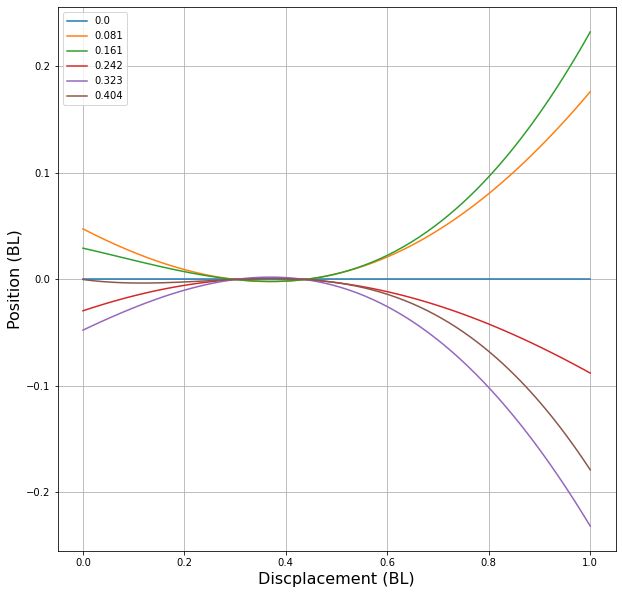

In [6]:
def h_wrt_time(dx, t, w, k, c):
    A = c[0]+c[1]*dx + c[2]*dx**2
    if(np.sin(w*t)>=0):
        return A*np.sin(w*t-k*dx) - A*np.sin(-k*dx)
    else:
        return A*np.sin(w*t-k*dx) + A*np.sin(-k*dx)

    # plot geometry
width = 10
plt.figure(figsize=(width, width))
plt.grid()
plt.xlabel('Discplacement (BL)', fontsize=16)
plt.ylabel('Position (BL)', fontsize=16)
for idx, t in enumerate(time):
    plt.plot(dx, h_wrt_time(xbar, t, WL, k, C)/BL, label=np.round(t, 3))
    
plt.legend()
    #plt.axis('scaled')

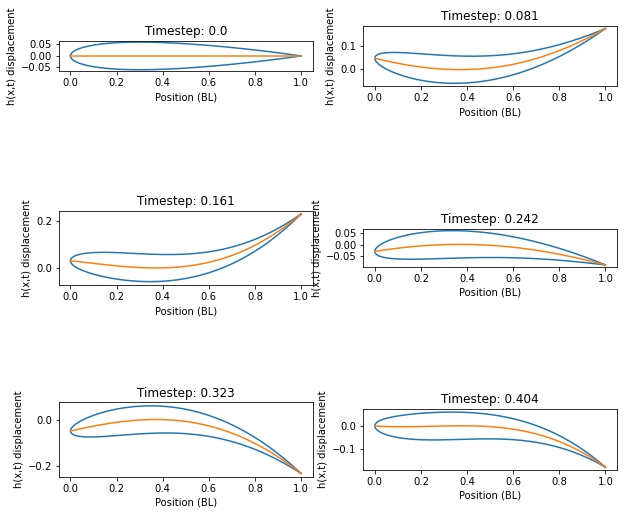

In [7]:
width = 10
nrows = int(np.ceil(len(time)/2))
fig, axs = plt.subplots(nrows, 2, figsize=(width, width), facecolor='w', edgecolor='k')
#fig.subplots_adjust(hspace = .5)

axs = axs.ravel()

for idx, t in enumerate(time):
    h = h_wrt_time(xbar, t, WL, k, C)/BL
    y_new = y + np.append(np.flipud(h), h[1::])
    axs[idx].plot(x, y_new)
    axs[idx].plot(dx, h)
    axs[idx].set_title('Timestep: ' + str(np.round(t,3)))
    axs[idx].set_ylabel('h(x,t) displacement')
    axs[idx].set_xlabel('Position (BL)')
    axs[idx].set_aspect('equal')
    #axs[idx].set_xlim(-0.1, 1.1)
    #axs[idx].set_ylim(-0.2, 0.2)